 #                          Project On Big_Mart_Sales_Analysis

##### About the dataset :
The dataset is collected by Data Scientists at Big Mart till year 2013. It consists of sales data for 1559 products across 10 stores in different cities.
The attributes of all


![Big Mart](https://tse3.mm.bing.net/th?id=OIP.UvErPV5nwUzEK64Re489DgHaEK&pid=15.1&P=0&w=317&h=179)

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# accessing data or importing dataset through csv file named as big mart
data = pd.read_csv("Big_mart.csv")

In [51]:
# checking data attributes using head Function
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
# Description of basic statistics on dataset (Big Mart Sales)
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [53]:
# Shape of data
data.shape

(8523, 12)

#### From the above configuration it is cleared that data has "8523" number of rows and "12" columns 

In [54]:
# Size of data
data.size

102276

In [55]:
# Last 5 rows of dataset
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [56]:
# Checking NUll values in data using isnull() function
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [57]:
# replacing values
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat':'Low Fat',
                                                             'reg':'Regular' ,
                                                             'LF':'Low Fat'} )

#### Here we get null entries in column "Item_Weight" and "Outlet_Size" having 1463 and 2410 null values respectively.

In [58]:
from scipy.stats import mode

# Filling null values of the column with mean of corresponding column
data = data.fillna(data.mean())

# Now Filling the null values with most occuring strings in the respective columns
#data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
outlet_size_mode = data.pivot_table(values=['Outlet_Size'] ,columns=['Outlet_Type'],aggfunc=lambda x:mode(x.astype('str')).mode[0])

outlet_size_mode
# Rechecking null values
#data.isnull().sum()

C:\Users\HP\Anaconda\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,nan,Small,Medium,Medium


In [59]:
data['Outlet_Size'] = np.where(((data['Outlet_Size'].isnull()) &
                               (data['Outlet_Type']=="Grocery Store")),\
                               "Small",data['Outlet_Size'])

a=data[data['Outlet_Type']=="Supermarket Type1"]['Outlet_Size'].mode()

b=data[data['Outlet_Type']=="Supermarket Type2"]['Outlet_Size'].mode()

c=data[data['Outlet_Type']=="Grocery Store"]['Outlet_Size'].mode()

d=data[data['Outlet_Type']=="Supermarket Type3"]['Outlet_Size'].mode()
print(a,b,c,d)


0    Small
dtype: object 0    Medium
dtype: object 0    Small
dtype: object 0    Medium
dtype: object


In [60]:
data['Outlet_Size'] = np.where(((data['Outlet_Size'].isnull()) &
                               (data['Outlet_Type']=="Supermarket Type2")),\
                               "Medium",data['Outlet_Size'])
                                             


In [61]:
data['Outlet_Size'] = np.where(((data['Outlet_Size'].isnull()) &
                               (data['Outlet_Type']=="Supermarket Type1")),\
                               "Medium",data['Outlet_Size'])

#data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))


#### As shown from the above it is cleared that there is no null values remaining after filling null values column with mean values.

In [62]:
print(data.isnull().sum())

data.head()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Univariate Analysis

##### Outlet_Size - plot

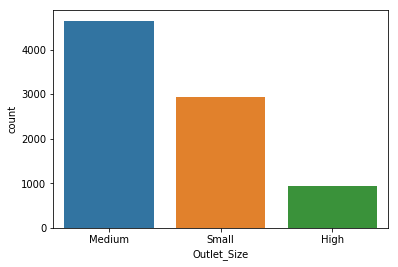

In [63]:
sns.countplot(data =data, x='Outlet_Size')

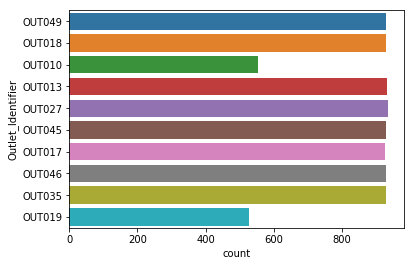

In [64]:
sns.countplot(data = data,y="Outlet_Identifier")

##### Item_Fat_Content - plot

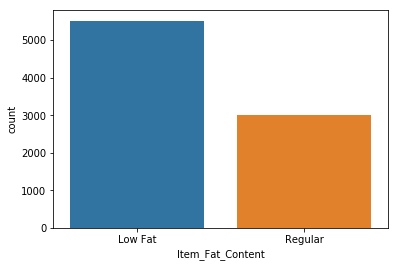

In [65]:
sns.countplot(data = data , x ='Item_Fat_Content')

##### Outlet_Type - plot

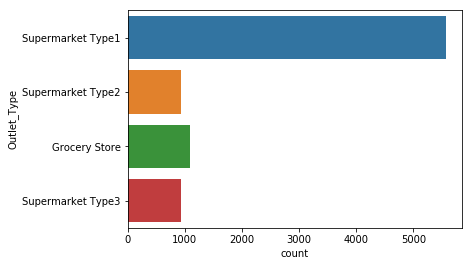

In [66]:
sns.countplot(data = data , y ='Outlet_Type')

##### Outlet_Location_Type - plot

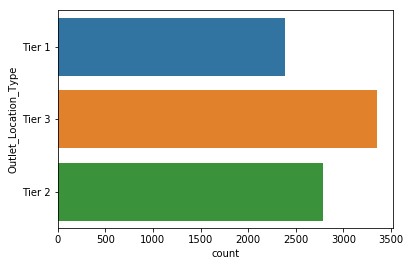

In [67]:
sns.countplot(data = data , y ='Outlet_Location_Type')

##### Outlet_Establishment_Year

(array([2395.,    0.,    0.,    0.,    0., 2415.,    0., 1859.,    0.,
        1854.]),
 array([1985. , 1987.4, 1989.8, 1992.2, 1994.6, 1997. , 1999.4, 2001.8,
        2004.2, 2006.6, 2009. ]),
 <a list of 10 Patch objects>)

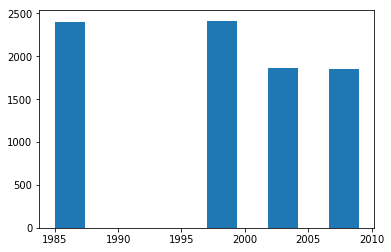

In [68]:
plt.hist(data=data, x='Outlet_Establishment_Year')

##### Item_MRP - plot

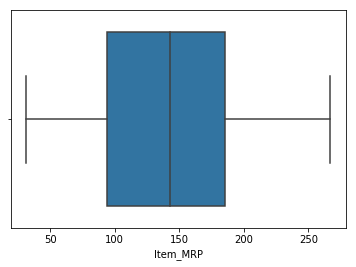

In [69]:
sns.boxplot(data=data,x='Item_MRP')

(array([168., 283., 267., 205., 247., 168.,  10., 148., 193., 284., 278.,
        298., 298., 322., 284., 344., 246.,  49., 180., 329., 310., 270.,
        277., 241., 331., 291., 300., 278., 195.,  32., 128., 125., 141.,
        162., 126., 128., 129., 142., 159., 157.]),
 array([ 31.29   ,  37.17996,  43.06992,  48.95988,  54.84984,  60.7398 ,
         66.62976,  72.51972,  78.40968,  84.29964,  90.1896 ,  96.07956,
        101.96952, 107.85948, 113.74944, 119.6394 , 125.52936, 131.41932,
        137.30928, 143.19924, 149.0892 , 154.97916, 160.86912, 166.75908,
        172.64904, 178.539  , 184.42896, 190.31892, 196.20888, 202.09884,
        207.9888 , 213.87876, 219.76872, 225.65868, 231.54864, 237.4386 ,
        243.32856, 249.21852, 255.10848, 260.99844, 266.8884 ]),
 <a list of 40 Patch objects>)

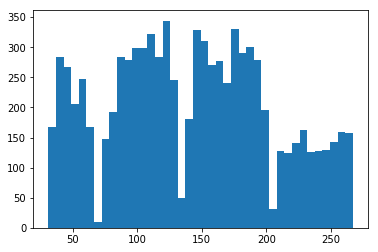

In [70]:
plt.hist(data=data,x='Item_MRP',bins=40)

## Bivariate Analysis 

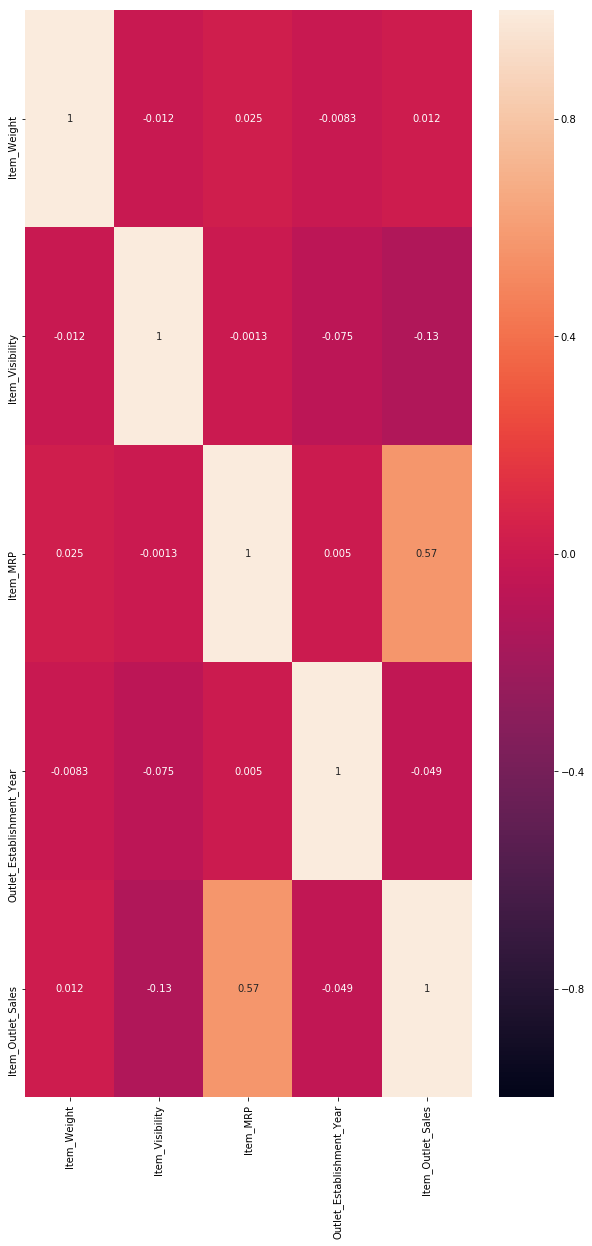

In [71]:
#correlation between columns pairwise
data.corr()
plt.figure(figsize=(10,20))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,square=False)

### Bivariate Analysis using regplot

### Item_MRP vs Item_outlet_sales

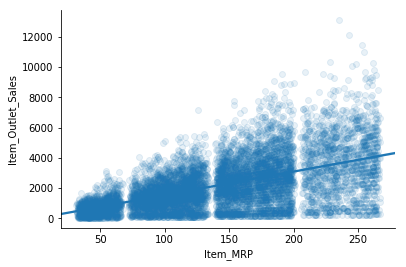

In [72]:
sns.regplot(data=data , y='Item_Outlet_Sales' , x='Item_MRP',y_jitter=0.2,scatter_kws={'alpha':0.1})
sns.despine()

### Outlet_Establishment_Year vs Item_MRP

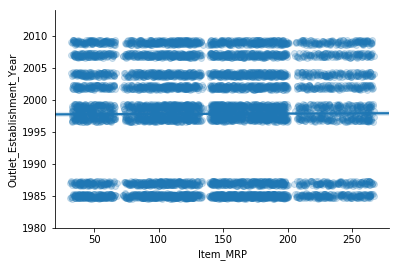

In [73]:
sns.regplot(data = data,y='Outlet_Establishment_Year',x='Item_MRP',y_jitter=0.4,scatter_kws={'alpha':0.2})
sns.despine()

### Inlet_Outlet_Sales vs Outlet_Establishment_Year

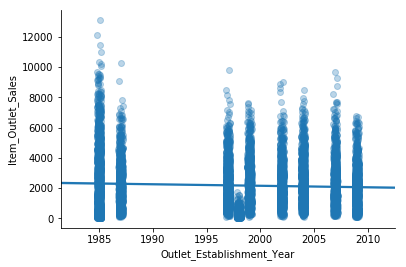

In [74]:
sns.regplot(data = data,y='Item_Outlet_Sales',x='Outlet_Establishment_Year',x_jitter=0.2,scatter_kws={'alpha':0.3})
sns.despine()

#### Joint plot for the above one

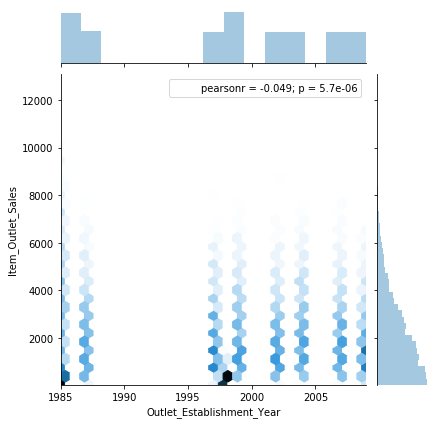

In [75]:
sns.jointplot(data = data, y='Item_Outlet_Sales',x='Outlet_Establishment_Year',kind="hex")

### Feature Engineering

In [76]:
data.pivot_table(values='Item_Outlet_Sales' , index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


##### As from the above table it is clear that to make our data more efficient for analysis we won't be able to combine these two (Supermarket Type1 and Supermarket Type2 or with Supermarket Type3) because there values have a significance difference in between them.

In [77]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


Now for another part of feature engineering we come for feature Item_Visibility, or in other words by looking directly into the column "Item_Visibility" we came to know that there is some entries available with value '0' , which doesn't even make any sense. so for better prediction we have to treat these values.

To remove '0' from the above we may impute these values by averages by taking any other column as index such as(i.e 'Item_Identifier')

In [78]:
# First calculating average so that zeros in column Item_Visibility can be replaced
avg_vis = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

avg_vis

,Item_Visibility
Item_Identifier,
DRA12,0.031956
DRA24,0.048062
DRA59,0.134718
DRB01,0.082126
DRB13,0.008002
DRB24,0.020624
DRB25,0.077305
DRB48,0.023700
DRC01,0.019219


In [79]:
#zero_values = (data['Item_Visibility']==0)

#zero_values
#data.loc[zero_values,'Item_Visibility'] = data.loc[zero_values,'Item_Identifier'].apply(lambda x: avg_vis[x].get)



In [80]:
avg = data['Item_Visibility'].mean()
avg

0.06613202877895127

In [81]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0,avg)

In [82]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Now, after "Item_visibility" if we have look at another column "Item_Type" one new column be made by comapcting this enlarge variety in it.

In [83]:
data['Item_Type_New'] = data['Item_Identifier'].apply(lambda x: x[0:2])

# now renaming the new assigned into a different cluster
data['Item_Type_New'] = data['Item_Type_New'].map({'FD':'Food',
                                                  'NC':'Non-Consumable',
                                                  'DR':'Drinks'})
                                                  
data['Item_Type_New'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_New, dtype: int64

From the above table, we can conclude that total values of 'Food' , 'Non-Consumable' and 'Drinks' have values "6125","1599" and "799"
respectively.

In [84]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


We should also work on the addition feature of dataset which tells us about the condition as well as popularity of mart.For this we can find out the difference of Outlet_Establishment from 2013 (as the dataset is till that year). Finally after doing this we will be able to get how old that is.

In [85]:
data['Outlet_Years'] = 2013-data['Outlet_Establishment_Year']

data['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [86]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_New', 'Outlet_Years'],
      dtype='object')

Minimum year value is '4' and maximum year value is '28' years old.

In [87]:
# now converting categorical values into the numeric ones
#importing library from sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#fiting label encoder using fit_transform()
#new column Outlet is taken here
data['Outlet'] = le.fit_transform(data['Item_Identifier'])

mod = ['Item_Fat_Content','Outlet','Outlet_Size','Item_Type_New','Outlet_Location_Type']

le = preprocessing.LabelEncoder()
for i in mod:
    data[i]= le.fit_transform(data[i])


In [88]:
data_1 = pd.get_dummies(data,columns = ['Item_Fat_Content','Outlet','Outlet_Size','Item_Type_New','Outlet_Location_Type'])
data_1

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Outlet_Years,...,Outlet_1558,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_Type_New_0,Item_Type_New_1,Item_Type_New_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2
0,FDA15,9.300000,0.016047,Dairy,249.8092,OUT049,1999,Supermarket Type1,3735.1380,14,...,0,0,1,0,0,1,0,1,0,0
1,DRC01,5.920000,0.019278,Soft Drinks,48.2692,OUT018,2009,Supermarket Type2,443.4228,4,...,0,0,1,0,1,0,0,0,0,1
2,FDN15,17.500000,0.016760,Meat,141.6180,OUT049,1999,Supermarket Type1,2097.2700,14,...,0,0,1,0,0,1,0,1,0,0
3,FDX07,19.200000,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Grocery Store,732.3800,15,...,0,0,0,1,0,1,0,0,0,1
4,NCD19,8.930000,0.066132,Household,53.8614,OUT013,1987,Supermarket Type1,994.7052,26,...,0,1,0,0,0,0,1,0,0,1
5,FDP36,10.395000,0.066132,Baking Goods,51.4008,OUT018,2009,Supermarket Type2,556.6088,4,...,0,0,1,0,0,1,0,0,0,1
6,FDO10,13.650000,0.012741,Snack Foods,57.6588,OUT013,1987,Supermarket Type1,343.5528,26,...,0,1,0,0,0,1,0,0,0,1
7,FDP10,12.857645,0.127470,Snack Foods,107.7622,OUT027,1985,Supermarket Type3,4022.7636,28,...,0,0,1,0,0,1,0,0,0,1
8,FDH17,16.200000,0.016687,Frozen Foods,96.9726,OUT045,2002,Supermarket Type1,1076.5986,11,...,0,0,1,0,0,1,0,0,1,0
9,FDU28,19.200000,0.094450,Frozen Foods,187.8214,OUT017,2007,Supermarket Type1,4710.5350,6,...,0,0,1,0,0,1,0,0,1,0


In [89]:
data_1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
Outlet_4                       uint8
Outlet_5                       uint8
Outlet_6                       uint8
Outlet_7                       uint8
Outlet_8                       uint8
Outlet_9                       uint8
Outlet_10                      uint8
Outlet_11                      uint8
Outlet_12                      uint8
Outlet_13                      uint8
Outlet_14                      uint8
O

In [90]:

data_2 = data_1
data_2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Outlet_Years,...,Outlet_1558,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_Type_New_0,Item_Type_New_1,Item_Type_New_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Supermarket Type1,3735.1380,14,...,0,0,1,0,0,1,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Supermarket Type2,443.4228,4,...,0,0,1,0,1,0,0,0,0,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Supermarket Type1,2097.2700,14,...,0,0,1,0,0,1,0,1,0,0
3,FDX07,19.20,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Grocery Store,732.3800,15,...,0,0,0,1,0,1,0,0,0,1
4,NCD19,8.93,0.066132,Household,53.8614,OUT013,1987,Supermarket Type1,994.7052,26,...,0,1,0,0,0,0,1,0,0,1


In [92]:
# Now dropping the already converted columns which has least preference
data_2.drop(['Item_Type','Outlet_Establishment_Year','Item_Weight'],axis =1,inplace=True)

ValueError: labels ['Item_Type' 'Outlet_Establishment_Year' 'Item_Weight'] not contained in axis

In [93]:
data_2.head()

,Item_Identifier,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_0,...,Outlet_1558,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_Type_New_0,Item_Type_New_1,Item_Type_New_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2
0,FDA15,0.016047,249.8092,OUT049,Supermarket Type1,3735.1380,14,1,0,0,...,0,0,1,0,0,1,0,1,0,0
1,DRC01,0.019278,48.2692,OUT018,Supermarket Type2,443.4228,4,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,FDN15,0.016760,141.6180,OUT049,Supermarket Type1,2097.2700,14,1,0,0,...,0,0,1,0,0,1,0,1,0,0
3,FDX07,0.066132,182.0950,OUT010,Grocery Store,732.3800,15,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,NCD19,0.066132,53.8614,OUT013,Supermarket Type1,994.7052,26,1,0,0,...,0,1,0,0,0,0,1,0,0,1


### Model training and testing 

In [94]:
y = data_2['Item_Outlet_Sales']

In [96]:
# x=data_2.drop(['Item_Identifier','Outlet_Identifier','Outlet_Type','Item_Outlet_Sales','Item_MRP'],axis=1,inplace=True)
# the above line isn't returning anything so just write this 
data_2.drop(['Item_Identifier','Outlet_Identifier','Outlet_Type','Item_Outlet_Sales','Item_MRP'],axis=1,inplace=True)
#It will drop the mentioned columns and save the changes within data_2 only
# Now give data_2 for testing and it is working

In [100]:
data_2.head()

,Item_Visibility,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,...,Outlet_1558,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_Type_New_0,Item_Type_New_1,Item_Type_New_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2
0,0.016047,14,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,0.019278,4,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0.016760,14,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,0.066132,15,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0.066132,26,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


### Using Linear Regression Model

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
l_r = LinearRegression()

In [102]:
# dividing dataset for training and testing

x_train ,x_test ,y_train ,y_test = train_test_split(data_2 ,y , test_size=0.30 , random_state = 30)

In [103]:
data_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1572 entries, Item_Visibility to Outlet_Location_Type_2
dtypes: float64(1), int64(1), uint8(1570)
memory usage: 12.9 MB
